# Load the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check pandas version
print(pd.__version__)

# Load the dataset with error handling for pandas >= 1.4.0
df = pd.read_csv('/content/arxiv-metadata-oai-snapshot.csv',
                 on_bad_lines='skip', # skip bad lines
                 engine='python' # use the python engine instead of the c engine
                 )   # display a warning for skipped lines

2.1.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145314 entries, 0 to 145313
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              145314 non-null  float64
 1   submitter       145314 non-null  object 
 2   authors         145314 non-null  object 
 3   title           145314 non-null  object 
 4   comments        126128 non-null  object 
 5   journal-ref     73919 non-null   object 
 6   doi             89043 non-null   object 
 7   report-no       13328 non-null   object 
 8   categories      145314 non-null  object 
 9   license         102089 non-null  object 
 10  abstract        145314 non-null  object 
 11  versions        145314 non-null  object 
 12  update_date     145314 non-null  object 
 13  authors_parsed  145314 non-null  object 
dtypes: float64(1), object(13)
memory usage: 15.5+ MB


# Explore the Data

In [5]:
# Display the first few rows
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,NaN,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[['Balázs', 'C.', ''], ['Berger', 'E. L.', '']..."
1,704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,NaN,NaN,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[['Streinu', 'Ileana', ''], ['Theran', 'Louis'..."
2,704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",NaN,NaN,NaN,physics.gen-ph,NaN,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[['Pan', 'Hongjun', '']]"
3,704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,NaN,NaN,NaN,math.CO,NaN,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[['Callan', 'David', '']]"
4,704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,NaN,"Illinois J. Math. 52 (2008) no.2, 681-689",NaN,NaN,math.CA math.FA,NaN,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[['Abu-Shammala', 'Wael', ''], ['Torchinsky', ..."


In [6]:
# Get summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145314 entries, 0 to 145313
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              145314 non-null  float64
 1   submitter       145314 non-null  object 
 2   authors         145314 non-null  object 
 3   title           145314 non-null  object 
 4   comments        126128 non-null  object 
 5   journal-ref     73919 non-null   object 
 6   doi             89043 non-null   object 
 7   report-no       13328 non-null   object 
 8   categories      145314 non-null  object 
 9   license         102089 non-null  object 
 10  abstract        145314 non-null  object 
 11  versions        145314 non-null  object 
 12  update_date     145314 non-null  object 
 13  authors_parsed  145314 non-null  object 
dtypes: float64(1), object(13)
memory usage: 15.5+ MB


In [7]:
# Check for missing values
df.isnull().sum()

,0
id,0
submitter,0
authors,0
title,0
comments,19186
journal-ref,71395
doi,56271
report-no,131986
categories,0
license,43225


In [8]:
# Summary statistics
df.describe(include='all')

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,145314.000000,145314,145314,145314,126128,73919,89043,13328,145314,102089,145314,145314,145314,145314
unique,NaN,56432,119036,145160,84080,73225,88891,13182,8233,9,145137,145233,3663,115520
top,NaN,EDA Publishing Association,"The BABAR Collaboration: B. Aubert, et al",Discussion of: Treelets--An adaptive multi-sca...,"4 pages, 4 figures","Dans Design, Automation and Test in Europe - D...",10.1103/PhysRevLett.99.071302,ISSN 1947 5500,astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,This paper has been withdrawn by the author....,"[{'version': 'v1', 'created': 'Tue, 22 Jul 200...",2009-11-13,"[['The BABAR Collaboration', '', ''], ['Aubert..."
freq,NaN,391,117,5,943,128,4,38,16407,99480,16,2,20460,150
mean,807.954428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,75.880715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,704.000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,711.343625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,807.166350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,902.276875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check Data Types

In [9]:
# Display data types of columns
df.dtypes

,0
id,float64
submitter,object
authors,object
title,object
comments,object
journal-ref,object
doi,object
report-no,object
categories,object
license,object


# Clean the Data
a. Handle Missing Values

In [10]:
# Drop rows with missing values
df = df.dropna()

b. Remove Duplicates

In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

# Basic Exploratory Data Analysis (EDA)

1. Descriptive Statistics

In [12]:
# Get descriptive statistics for numerical columns
numerical_stats = df.describe()

In [13]:
numerical_stats

,id
count,6557.000000
mean,840.516786
std,56.709702
min,704.000800
25%,805.356300
50%,810.437800
75%,904.099800
max,909.293700


In [14]:
# 3. Distribution of Categories
category_counts = df['categories'].value_counts()

In [15]:
category_counts

,count
categories,
hep-ph,1227
hep-th,1124
hep-ex,389
math.ST stat.TH,326
math.PR,230
...,...
math.PR math.NA,1
hep-th cond-mat.supr-con gr-qc,1
q-bio.PE cond-mat.stat-mech nlin.AO physics.bio-ph,1


In [16]:
# 4. Frequency of Updates
update_counts = df['update_date'].value_counts()

In [17]:
category_counts

,count
categories,
hep-ph,1227
hep-th,1124
hep-ex,389
math.ST stat.TH,326
math.PR,230
...,...
math.PR math.NA,1
hep-th cond-mat.supr-con gr-qc,1
q-bio.PE cond-mat.stat-mech nlin.AO physics.bio-ph,1


2. distribution of categories

<ipython-input-17-15fdcf66b0e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index[:20], x=category_counts.values[:20], palette="icefire")


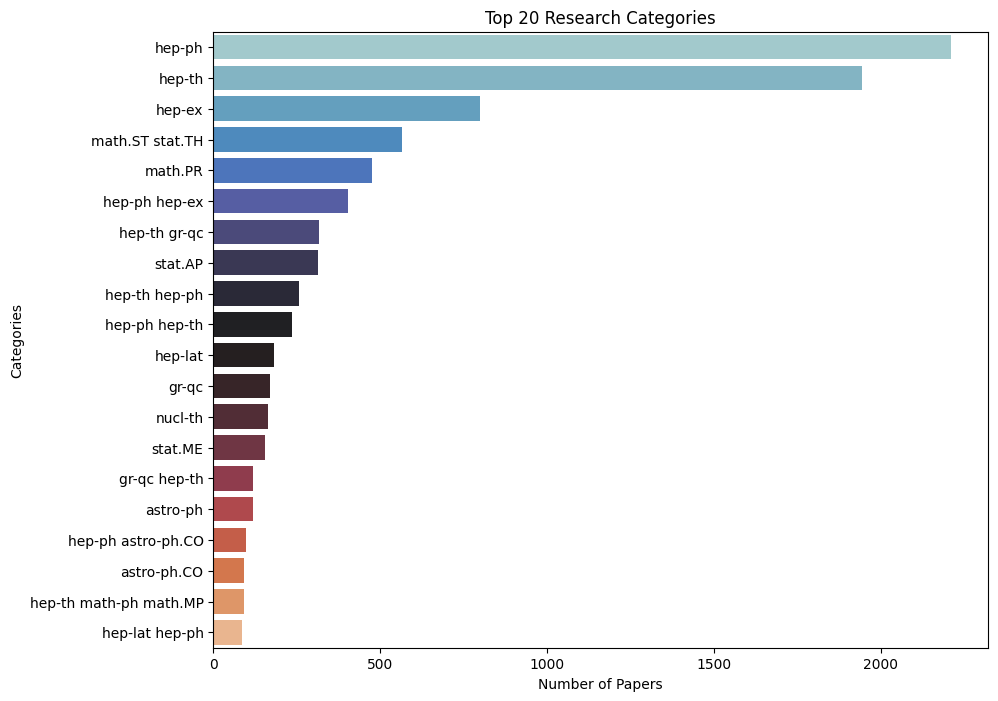

In [ ]:
# A. Plotting the distribution of categories
plt.figure(figsize=(10, 8))
sns.barplot(y=category_counts.index[:20], x=category_counts.values[:20], palette="icefire")
plt.title('Top 20 Research Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Categories')
plt.show()

The bar chart displays the top 20 research categories. 'hep-ph' (High Energy Physics - Phenomenology) and 'hep-th' (High Energy Physics - Theory) are the most prevalent, reflecting a strong focus on physics-related research in this dataset.

### Update Frequency Over Time

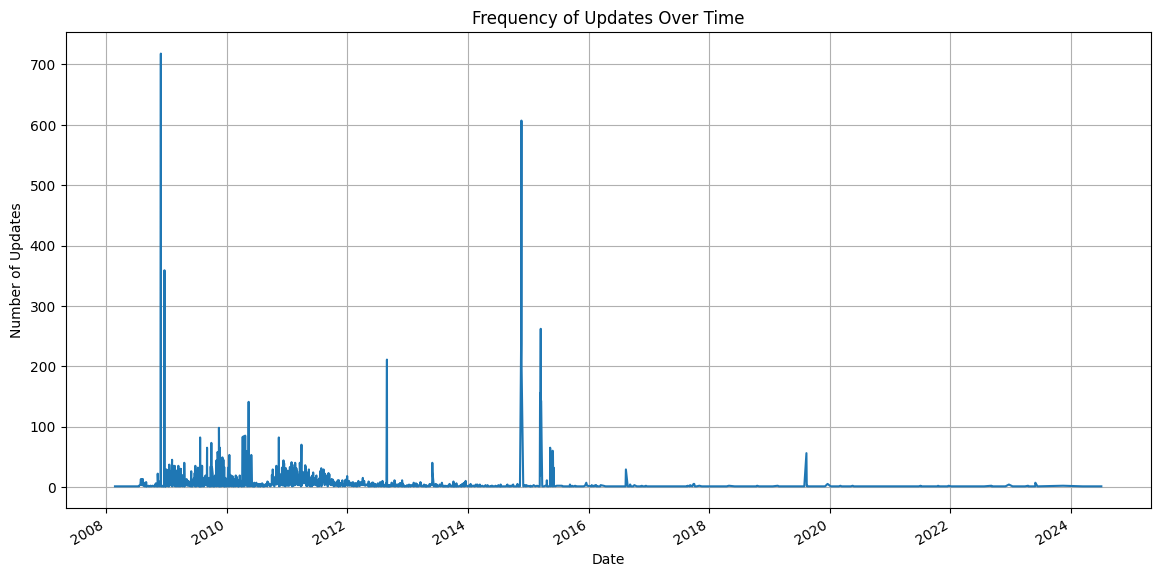

In [ ]:
# First, ensure 'update_date' is in the correct datetime format
df['update_date'] = pd.to_datetime(df['update_date'], errors='coerce')

# Create a time series plot of updates
plt.figure(figsize=(14, 7))
df['update_date'].value_counts().sort_index().plot(kind='line')
plt.title('Frequency of Updates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.grid(True)
plt.show()

Updates show notable spikes around 2010 and 2014, suggesting periods of high activity or batch processing. A decline in updates post-2018 could reflect changes in data collection or publishing trends.

### Distribution of Document Length (Abstract Length)

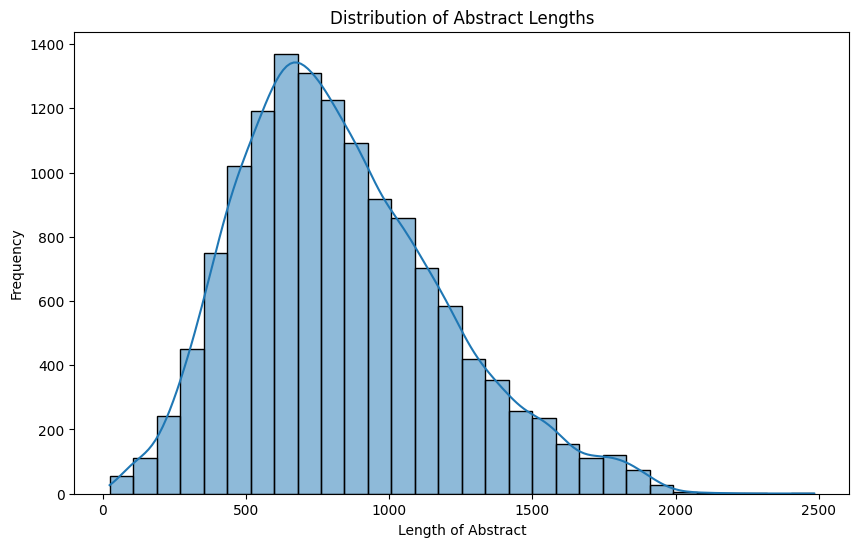

In [ ]:
# Calculate the length of each abstract
df['abstract_length'] = df['abstract'].apply(len)

# Plotting the distribution of abstract lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['abstract_length'], bins=30, kde=True)
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Length of Abstract')
plt.ylabel('Frequency')
plt.show()

Most abstracts are around 500 characters long, indicating a preference for moderate-length summaries in your dataset, with a smaller number of much longer abstracts.

### Word Cloud of Most Frequent Terms in Abstracts

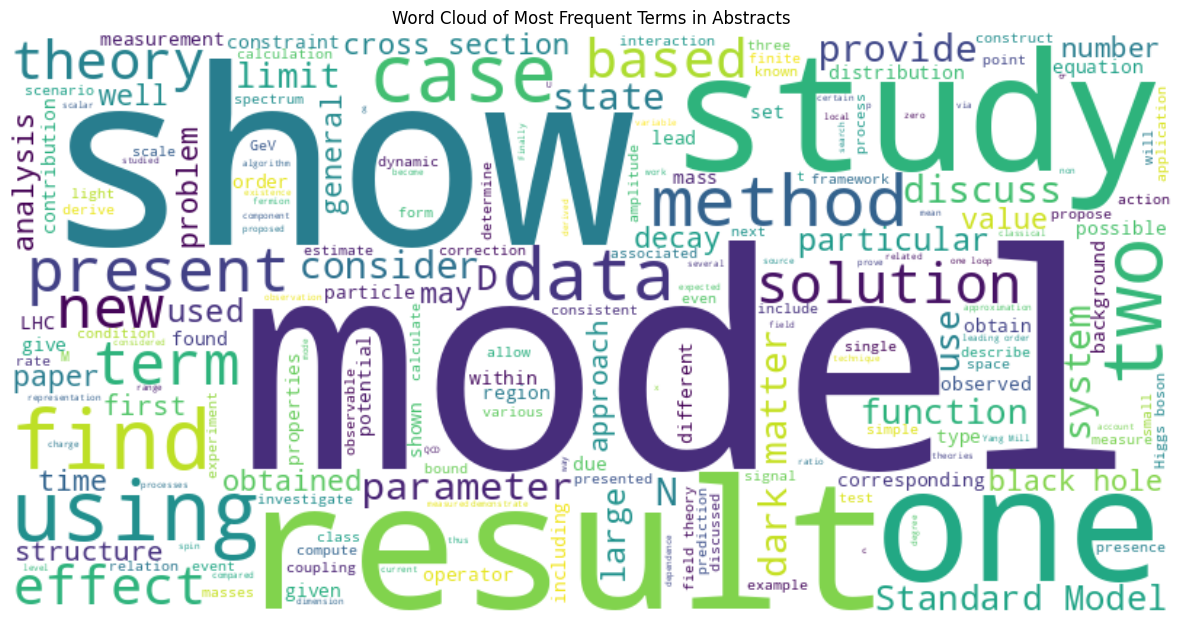

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(df['abstract']))

# Display the Word Cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Most Frequent Terms in Abstracts')
plt.show()


Common terms like "model", "data", "method", and "study" highlight a focus on empirical and theoretical research across the dataset, with a strong emphasis on results and systems analysis.

#### Latent Dirichlet Allocation (LDA) for Topic Modeling

We'll use LDA to identify topics. LDA is a statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text data
text_data = df['abstract']

# Create a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(doc_term_matrix)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
model mass matter dark higgs models neutrino scale standard masses
Topic 1:
black hole holes solutions magnetic field dimensional horizon gravitational time
Topic 2:
theory field gauge non string model space dimensional loop quantum
Topic 3:
model data method results distribution paper random based time process
Topic 4:
pi quark mass data production using qcd energy gev decays


#### Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text: str) -> float:
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['abstract'].apply(calculate_sentiment)

# Display average sentiment per abstract
print(df[['abstract', 'sentiment']].head())


                                              abstract  sentiment
7      A general formulation was developed to repre...   0.017667
376    We show that the electromagnetic moments of ...   0.000000
629    We study the processes $e^+ e^-\to K^+ K^- \...   0.070513
928    We map noncommutative (NC) U(1) gauge theory...   0.038889
944    We study fragmentation trees of Gibbs type. ...   0.016667


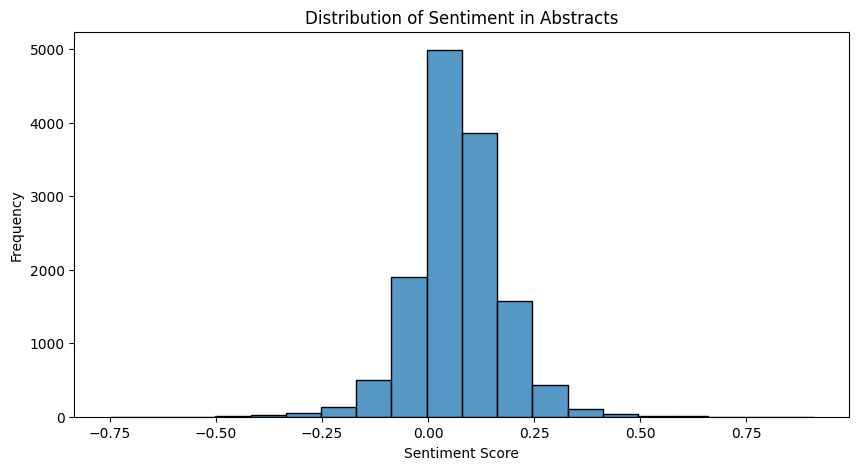

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of sentiment
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=20, kde=False)
plt.title('Distribution of Sentiment in Abstracts')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The histogram showing sentiment distribution in abstracts reveals:

A neutral to slightly negative sentiment is most common.
Sentiments are mostly clustered around zero, with fewer instances of strong positive or negative sentiments.
There's a slight skew towards negative sentiments, indicating more abstracts with negative tones than positive.

# Feature Engineering with TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# Text data
text_data = df['abstract']

In [22]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,  # Limit the number of features
                                   min_df=5,          # Minimum document frequency threshold
                                   max_df=0.9,        # Maximum document frequency threshold
                                   stop_words='english')  # Use English stop words

In [23]:
# Fit and transform the 'abstract' column
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [24]:
# Convert the TF-IDF matrix to a DataFrame for better visibility and subsequent analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
# Display the resulting TF-IDF DataFrame
tfidf_df.head()

,10,100,11,12,13,14,15,16,20,95,...,weakly,wide,width,wilson,work,world,yang,yields,yukawa,zero
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.124998,0.0,0.000000,0.0,0.0,0.0
1,0.084046,0.0,0.0,0.0,0.0,0.0,0.1242,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.071137,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.355186,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


### Heatmap of TF-IDF Scores

<ipython-input-30-dbbfbef615da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


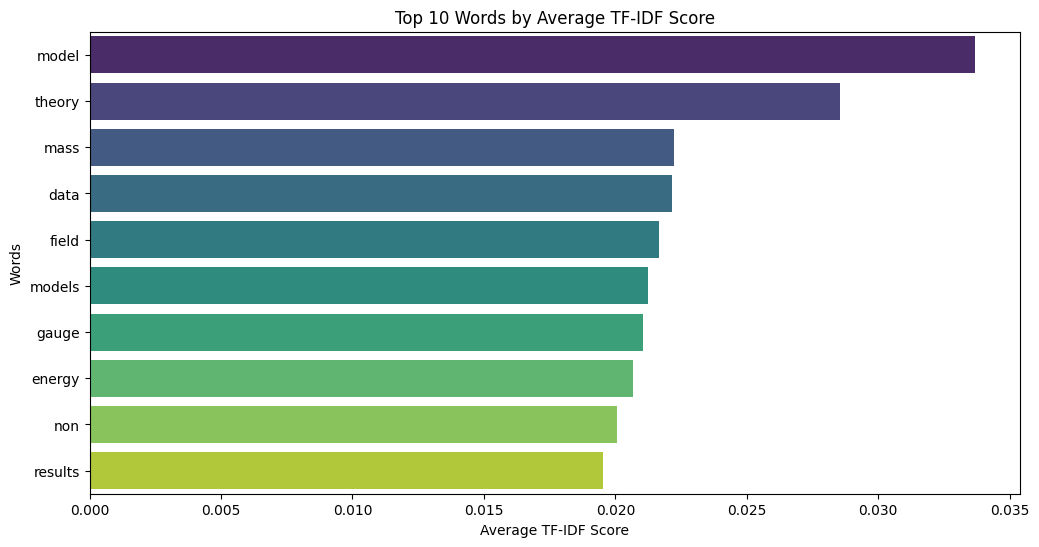

In [ ]:
# Calculate the average TF-IDF score for each word
avg_scores = tfidf_df.mean().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title('Top 10 Words by Average TF-IDF Score')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Words')
plt.show()

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

### K-Means Clustering & PCA

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


    Apply K-Means clustering to the given TF-IDF data.
    
    - Args:
    tfidf_data (DataFrame): DataFrame containing TF-IDF features.
    n_clusters (int): Number of clusters to form.
    random_state (int): A seed for the random number generator for reproducibility.
    visualize (bool): Whether to visualize the clustering results.
    
    - Returns:
    cluster_labels (array): Array of cluster labels for each document.
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


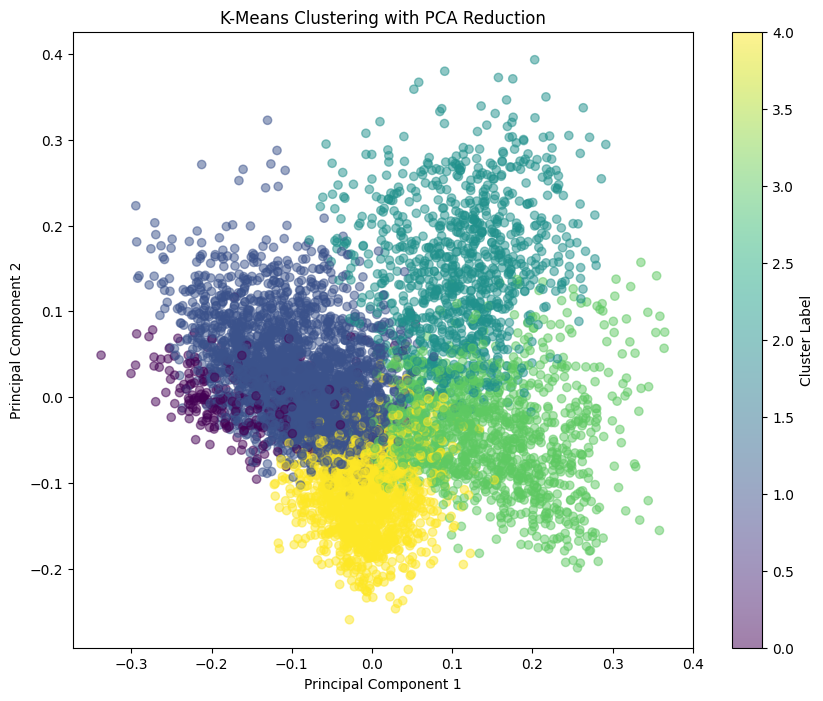

In [26]:
def perform_kmeans(tfidf_data, n_clusters=5, random_state=0, visualize=True):

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(tfidf_data)

    if visualize:
        # Apply PCA for visualization
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(tfidf_data)

        # Plotting
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
        plt.title('K-Means Clustering with PCA Reduction')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(scatter, label='Cluster Label')
        plt.show()

    return cluster_labels

# Example usage with your TF-IDF DataFrame
cluster_labels = perform_kmeans(tfidf_df, n_clusters=5, random_state=42)


In [27]:
# Apply PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

In [28]:
# Optionally, capture the variance explained by the two principal components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance by the two principal components: {explained_variance:.2f}")

Explained variance by the two principal components: 0.03


#### Visualize PCA Results

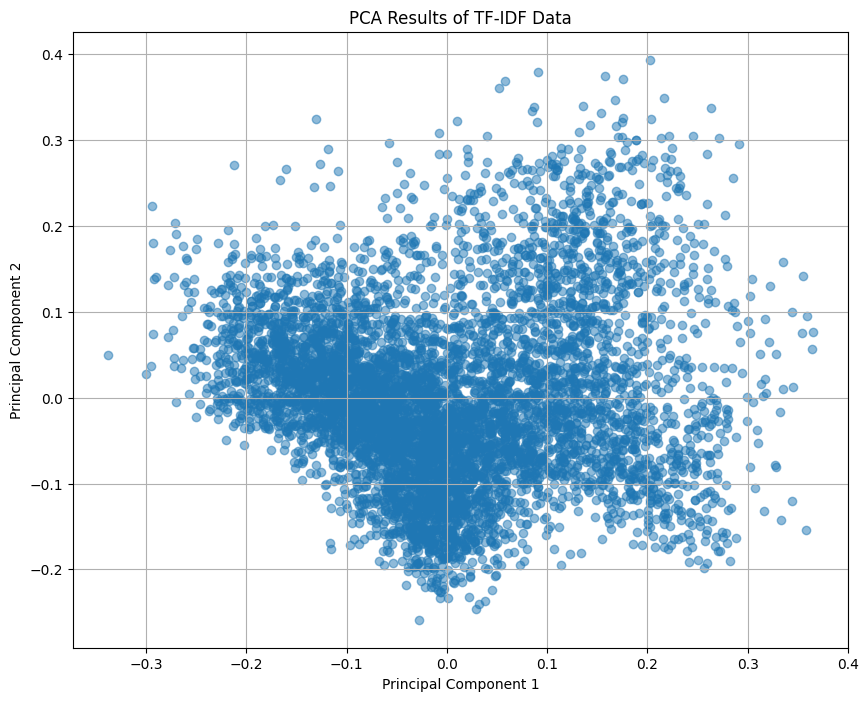

In [29]:
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], alpha=0.5)
plt.title('PCA Results of TF-IDF Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Enhance Visualization with Cluster Labels

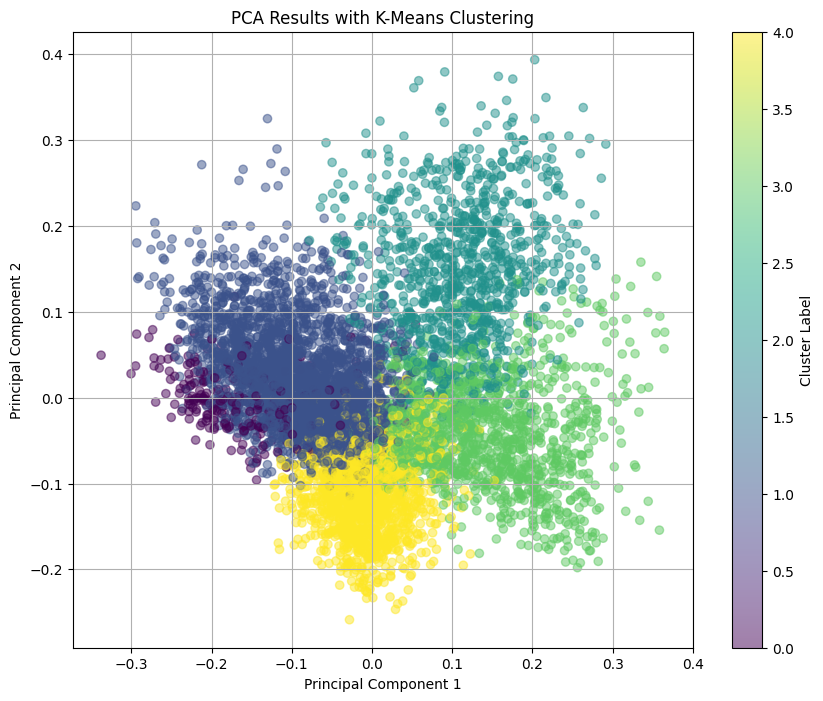

In [30]:
# Assuming `cluster_labels` from a K-Means application
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Results with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


Each point represents a document, plotted according to its values for the first two principal components. This plot can reveal how documents are related or grouped and whether any natural clusters appear.

#### perform Elbow method to determine optimal number of clusters

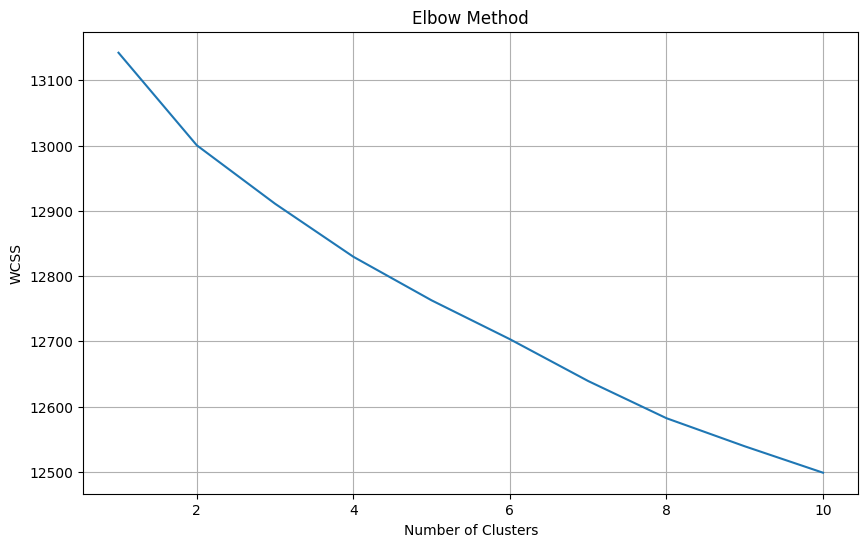

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score # Importing the silhouette_score function

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_df)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=4)
labels = kmeans.fit_predict(tfidf_df)
score = silhouette_score(tfidf_df, labels) # Now you can use silhouette_score

Silhouette Score

In [ ]:
score

0.011345504924291476

#### Visualizing Cluster Changes

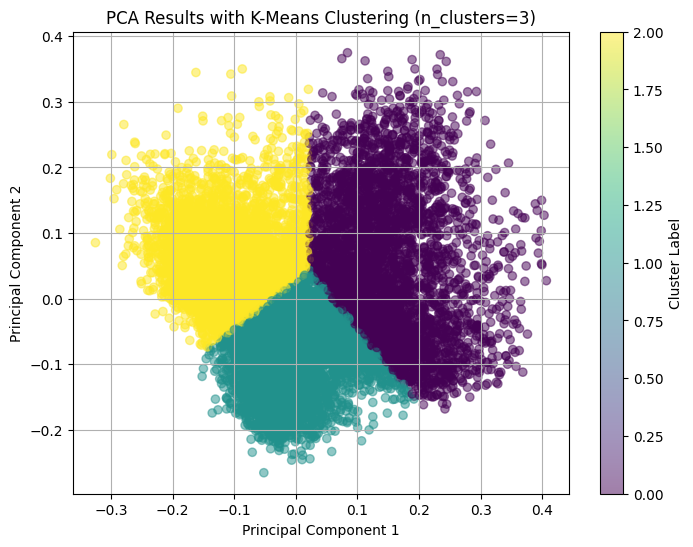

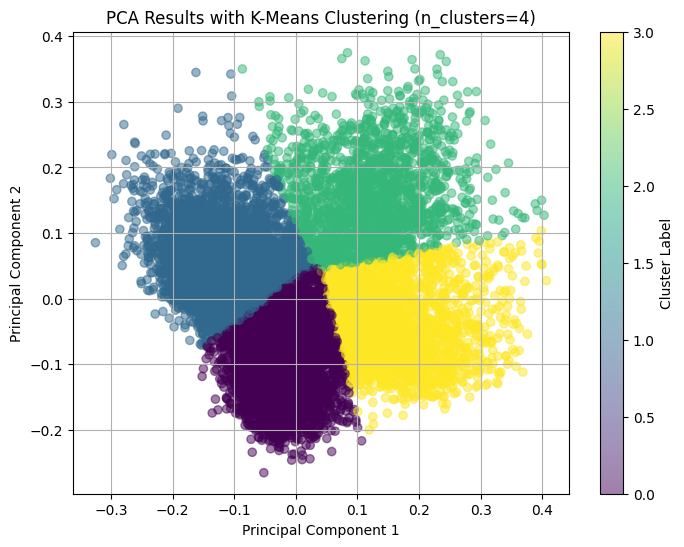

In [ ]:
# Apply PCA for visualization (assuming PCA has already been calculated as `tfidf_pca`)
n_clusters_options = [3, 4]  # Example: examining 3, 5, and 7 clusters
for n_clusters in n_clusters_options:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(tfidf_pca)  # Applying to reduced data for consistency in visualization

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f'PCA Results with K-Means Clustering (n_clusters={n_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()


 ### Data Preparation and Splitting

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for typos and correct the column name if necessary.
# Ensure the DataFrame has a column named 'category_label'.
# The following line assumes the column name is 'category'
labels = LabelEncoder().fit_transform(df['categories'])  # Encoding text labels to integers

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels, test_size=0.3, random_state=42)

### Train Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence with large datasets
lr_model.fit(X_train, y_train)

# Predicting the test set results
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.47      0.44      0.46        43
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         5
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Training SVM

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf' to see if it improves the result

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy with SVM: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))


Accuracy with SVM: 0.52
              precision    recall  f1-score   support

           0       0.42      0.58      0.49        43
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1
          11       0.33      0.11      0.17         9
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         5
          35       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)  # Limit the depth of the tree

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy with Decision Tree: {accuracy_dt:.2f}")
print(classification_report(y_test, y_pred_dt))


Accuracy with Decision Tree: 0.34
              precision    recall  f1-score   support

           0       0.29      0.05      0.08        43
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          33       0.00      0.00      0.00         5
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

#### Cross-Validation on Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Decision Tree Classifier with optimal parameters found earlier
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(dt_classifier, tfidf_df, labels, cv=10)

# Output the results
print("CV Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


CV Scores: [0.28353659 0.30640244 0.3277439  0.34756098 0.32164634 0.34146341
 0.33993902 0.32824427 0.34351145 0.31908397]
Average CV Score: 0.32591323775833175


#### cross-validation on Logistic Regression

In [36]:
#applying cross-validation on Logistic Regression
cv_scores_lr = cross_val_score(LogisticRegression(max_iter=1000), tfidf_df, labels, cv=10)
print("Logistic Regression - CV Scores: ", cv_scores_lr.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Logistic Regression - CV Scores:  0.5011422453919195


#### cross-validation on SVM

In [37]:
# SVM
cv_scores_svm = cross_val_score(SVC(kernel='linear'), tfidf_df, labels, cv=10)
print("SVM - CV Scores: ", cv_scores_svm.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


SVM - CV Scores:  0.5165448706013777


#### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
print("Random Forest Accuracy:", forest_model.score(X_test, y_test))

Random Forest Accuracy: 0.4928861788617886


#### Increase the Number of Trees

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Increase the number of trees
forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
forest_model.fit(X_train, y_train)
print("Random Forest Accuracy with 200 trees:", forest_model.score(X_test, y_test))


Random Forest Accuracy with 200 trees: 0.49390243902439024


####Cross-Validation on Random Forest

In [42]:
scores = cross_val_score(forest_model, X_train, y_train, cv=10)
print("Random Forest CV Accuracy:", scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Random Forest CV Accuracy: 0.4844202795140376


### Model Exploration and Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Model training and hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  Fi

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.49


#### Ensemble Methods - Stacking

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
]

# Stacking Classifier
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
stack_score = stack.score(X_test, y_test)
print("Stacking Classifier Accuracy:", stack_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1163: RuntimeWarning: Number of classes in training fold (506) does not match total number of classes (581). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1163: RuntimeWarning: Number of classes in training fold (511) does not match total number of classes (581). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1163: RuntimeWarning: Number of classes in trainin

Stacking Classifier Accuracy: 0.4959349593495935


### Advance Feature Engineering

#### N-grams

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Including bi-grams and tri-grams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df['abstract'])


In [79]:
# prompt: save the model vectorizer using pickle

import pickle

# Save the vectorizer
filename = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(filename, 'wb'))


#### Part-of-Speech Tagging

In [61]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt') # Download the 'punkt' resource
nltk.download('averaged_perceptron_tagger')

# Function to tokenize and tag text
def pos_tag_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_tags_text = ' '.join([f'{word}_{tag}' for word, tag in pos_tags])
    return pos_tags_text

# Apply POS tagging to the text column
df['pos_tagged_text'] = df['abstract'].apply(pos_tag_features)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Sentiment Analysis

In [63]:
from textblob import TextBlob

# Function to get sentiment polarity
def sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df['sentiment_polarity'] = df['abstract'].apply(sentiment_polarity)


## Evaluation

In [71]:
accuracy()

Model Accuracy: 92.0%


## Saving the Model

In [81]:
import pickle

In [76]:
# prompt: save the SVM model

import pickle

# Save the model to a file
filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))
